In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/zhongyang-hu/6289/main/TSLA.csv')
print(data.shape)
print(data.head(10))
print(data.isnull().values.any())

(1259, 7)
         Date       Open       High        Low      Close  Adj Close    Volume
0  2015-07-10  52.444000  52.599998  51.563999  51.830002  51.830002  13054500
1  2015-07-13  52.450001  52.509998  51.209999  52.431999  52.431999  14801500
2  2015-07-14  52.419998  53.198002  52.102001  53.130001  53.130001   9538000
3  2015-07-15  53.348000  53.498001  52.416000  52.627998  52.627998  10108000
4  2015-07-16  52.844002  53.439999  52.632000  53.335999  53.335999   8080000
5  2015-07-17  54.500000  55.108002  53.650002  54.931999  54.931999  25020500
6  2015-07-20  55.000000  57.330002  54.507999  56.452000  56.452000  24892500
7  2015-07-21  54.009998  54.700001  53.310001  53.354000  53.354000  30543500
8  2015-07-22  52.254002  53.888000  52.172001  53.574001  53.574001  15525000
9  2015-07-23  53.930000  53.980000  53.054001  53.439999  53.439999  11136000
False


In [139]:
#
#normalize
train_data=data.iloc[:1000,4:5].values


sc = MinMaxScaler(feature_range = (0, 1))
training_n = sc.fit_transform(train_data)
# Creating a data structure with 60 time-steps and 1 output
x_train = []
y_train = []
for i in range(73, 1000):
    temp=np.array([training_n[i-73:i-13, 0]])
    temp=temp.T
    
    
    x_train.append(temp)
    temp1=np.array([training_n[i-13, 0],training_n[i-6, 0],training_n[i, 0]])
    y_train.append(temp1)
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[2], 3))
print(x_train.shape)
print(y_train.shape)

(927, 60, 1)
(927, 3)


In [84]:
model1 = Sequential()
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))

model1.add(Dense(units = 3))


model1.compile(optimizer = 'adam', loss = 'mean_squared_error')


model1.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 17s 216ms/step - loss: 0.0823
Epoch 2/100
29/29 [==============================] - 4s 136ms/step - loss: 0.0233
Epoch 3/100
29/29 [==============================] - 5s 189ms/step - loss: 0.0213
Epoch 4/100
29/29 [==============================] - 4s 146ms/step - loss: 0.0201
Epoch 5/100
29/29 [==============================] - 6s 203ms/step - loss: 0.0194
Epoch 6/100
29/29 [==============================] - 6s 197ms/step - loss: 0.0197
Epoch 7/100
29/29 [==============================] - 4s 133ms/step - loss: 0.0170
Epoch 8/100
29/29 [==============================] - 4s 136ms/step - loss: 0.0170
Epoch 9/100
29/29 [==============================] - 4s 137ms/step - loss: 0.0156
Epoch 10/100
29/29 [==============================] - 4s 134ms/step - loss: 0.0169
Epoch 11/100
29/29 [==============================] - 4s 135ms/step - loss: 0.0172
Epoch 12/100
29/29 [==============================] - 4s 135ms/step - loss: 0.0165
Epoch 13/100

In [85]:
dataset_train = data.iloc[:1000, 4:5]
dataset_test = data.iloc[1000:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 319):
    temp=np.array([np.array(inputs[i-60:i, 0])])
    temp=temp.T
    
    
    x_test.append(temp)

x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[2], 3))
print(x_test.shape)

(319, 1)
(259, 60, 1)


In [86]:
predicted_lag = model1.predict(x_test)
predicted_lag=predicted_lag.T

predicted_lag1 = sc.inverse_transform(predicted_lag[0].reshape(1, -1))
print(predicted_lag1.shape)

(1, 259)


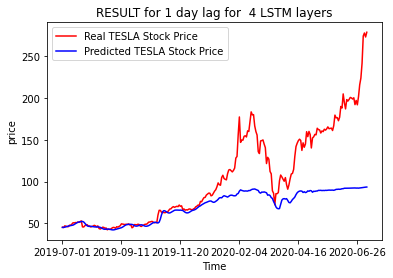

In [87]:
#RESULT for 1 day lag

plt.plot(data.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1000:, 'Date'],predicted_lag1.T, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,260,50))
plt.title('RESULT for 1 day lag for  4 LSTM layers')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [88]:
model2 = Sequential()
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))

model2.add(Dense(units = 3))


model2.compile(optimizer = 'adam', loss = 'mean_squared_error')


model2.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 18s 205ms/step - loss: 0.0838
Epoch 2/100
29/29 [==============================] - 6s 213ms/step - loss: 0.0266
Epoch 3/100
29/29 [==============================] - 6s 212ms/step - loss: 0.0228
Epoch 4/100
29/29 [==============================] - 6s 202ms/step - loss: 0.0211
Epoch 5/100
29/29 [==============================] - 6s 215ms/step - loss: 0.0212
Epoch 6/100
29/29 [==============================] - 6s 213ms/step - loss: 0.0192
Epoch 7/100
29/29 [==============================] - 6s 215ms/step - loss: 0.0200
Epoch 8/100
29/29 [==============================] - 6s 217ms/step - loss: 0.0185
Epoch 9/100
29/29 [==============================] - 6s 211ms/step - loss: 0.0186
Epoch 10/100
29/29 [==============================] - 6s 208ms/step - loss: 0.0184
Epoch 11/100
29/29 [==============================] - 6s 215ms/step - loss: 0.0171
Epoch 12/100
29/29 [==============================] - 6s 216ms/step - loss: 0.0177
Epoch 13/100

In [89]:
predicted_2 = model2.predict(x_test)
predicted_2=predicted_2.T

predicted_lag1 = sc.inverse_transform(predicted_2[0].reshape(1, -1))
print(predicted_lag1.shape)

(1, 259)


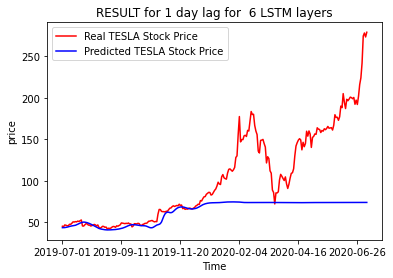

In [90]:
#RESULT for 1 day lag for  6 LSTM layers

plt.plot(data.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1000:, 'Date'],predicted_lag1.T, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,260,50))
plt.title('RESULT for 1 day lag for  6 LSTM layers')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [91]:
model3 = Sequential()
model3.add(LSTM(units = 80, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model3.add(Dropout(0.2))

model3.add(LSTM(units = 80, return_sequences = True))
model3.add(Dropout(0.2))

model3.add(LSTM(units = 80, return_sequences = True))
model3.add(Dropout(0.2))

model3.add(LSTM(units = 80))
model3.add(Dropout(0.2))

model3.add(Dense(units = 3))


model3.compile(optimizer = 'adam', loss = 'mean_squared_error')


model3.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 14s 180ms/step - loss: 0.0658
Epoch 2/100
29/29 [==============================] - 5s 179ms/step - loss: 0.0211
Epoch 3/100
29/29 [==============================] - 5s 178ms/step - loss: 0.0182
Epoch 4/100
29/29 [==============================] - 5s 178ms/step - loss: 0.0186
Epoch 5/100
29/29 [==============================] - 5s 180ms/step - loss: 0.0182
Epoch 6/100
29/29 [==============================] - 5s 181ms/step - loss: 0.0196
Epoch 7/100
29/29 [==============================] - 5s 181ms/step - loss: 0.0164
Epoch 8/100
29/29 [==============================] - 5s 177ms/step - loss: 0.0153
Epoch 9/100
29/29 [==============================] - 5s 179ms/step - loss: 0.0163
Epoch 10/100
29/29 [==============================] - 5s 182ms/step - loss: 0.0154
Epoch 11/100
29/29 [==============================] - 5s 180ms/step - loss: 0.0150
Epoch 12/100
29/29 [==============================] - 5s 181ms/step - loss: 0.0148
Epoch 13/100

In [92]:
predicted_1 = model1.predict(x_test)
predicted_1=predicted_1.T
predicted_2 = model2.predict(x_test)
predicted_2=predicted_2.T
predicted_3 = model3.predict(x_test)
predicted_3=predicted_3.T
predicted_1 = sc.inverse_transform(predicted_1)
predicted_2 = sc.inverse_transform(predicted_2)
predicted_3 = sc.inverse_transform(predicted_3)
print(predicted_1.shape)
print(predicted_2.shape)
print(predicted_3.shape)

(3, 259)
(3, 259)
(3, 259)


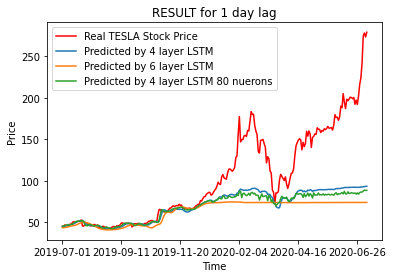

In [93]:
#plot all of three model lag 1
plt.plot(data.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1000:, 'Date'],predicted_1[0], label = 'Predicted by 4 layer LSTM')
plt.plot(data.loc[1000:, 'Date'],predicted_2[0], label = 'Predicted by 6 layer LSTM')
plt.plot(data.loc[1000:, 'Date'],predicted_3[0], label = 'Predicted by 4 layer LSTM 80 nuerons')
plt.xticks(np.arange(0,260,50))
plt.title('RESULT for 1 day lag')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

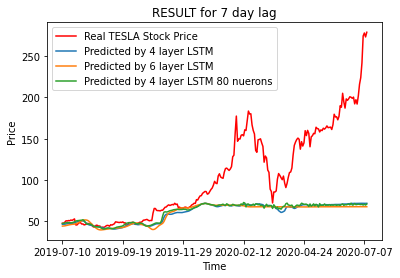

In [94]:
#plot all of three model lag 7
plt.plot(data.loc[1006:, 'Date'],dataset_test.values[6:], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1006:, 'Date'],predicted_1[1,:253], label = 'Predicted by 4 layer LSTM')
plt.plot(data.loc[1006:, 'Date'],predicted_2[1,:253], label = 'Predicted by 6 layer LSTM')
plt.plot(data.loc[1006:, 'Date'],predicted_3[1,:253], label = 'Predicted by 4 layer LSTM 80 nuerons')
plt.xticks(np.arange(0,260,50))
plt.title('RESULT for 7 day lag')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

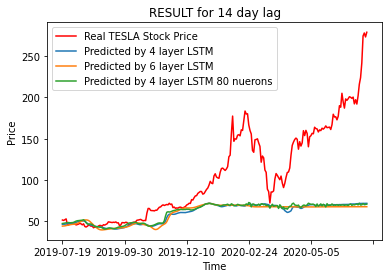

In [95]:
#plot all of three model lag 14
plt.plot(data.loc[1013:, 'Date'],dataset_test.values[13:], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1013:, 'Date'],predicted_1[1,:246], label = 'Predicted by 4 layer LSTM')
plt.plot(data.loc[1013:, 'Date'],predicted_2[1,:246], label = 'Predicted by 6 layer LSTM')
plt.plot(data.loc[1013:, 'Date'],predicted_3[1,:246], label = 'Predicted by 4 layer LSTM 80 nuerons')
plt.xticks(np.arange(0,260,50))
plt.title('RESULT for 14 day lag')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [163]:
#predict 
price=data.iloc[1199:1260,4:5].values


price = sc.transform(price)
temp=np.array([price[:, 0]])
temp=temp.T
temp=np.array(temp).reshape(1,60,1)

est=[]
for i in range(90):
    result=model1.predict(temp)
    est.append(sc.inverse_transform(result)[:,2])
    
    t=[]
    for i in range(1,60):
        t.append(float(temp[0,i,0]))
    
    t.append(float(result[0,0]))
    

    temp=np.array(t,dtype='float32').reshape(1,60,1)
    


    
    
    

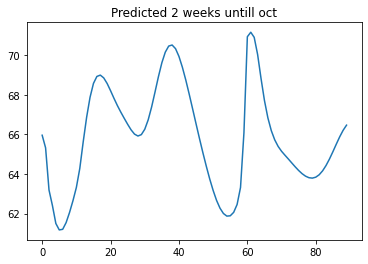

In [167]:
plt.plot([i for i in range(90)],est)
plt.title('Predicted 2 weeks untill oct')
plt.show()